# The Twitter API and Authentication

### API Authentication

In [6]:
# install needed packages
import sys
!conda install --yes --prefix {sys.prefix} tweepy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tweepy

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [17]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


### Streaming tweets

In [25]:
class MyStreamListener(tweepy.Stream):
    def on_status(self, status):
        print(status.text)

In [26]:
# Initialize Stream listener
l = MyStreamListener(consumer_key, consumer_secret, access_token, access_token_secret)

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

TypeError: __init__() missing 2 required positional arguments: 'access_token' and 'access_token_secret'

### Load and explore your Twitter data

In [27]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### Twitter data to DataFrame

In [28]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())


                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


### A little bit of Twitter text analysis

In [30]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [31]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


### Plotting your Twitter data

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


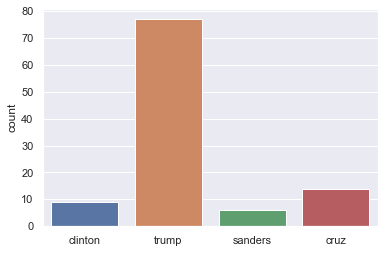

In [32]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']
vars = [clinton, trump, sanders, cruz]

# Plot the bar chart
ax = sns.barplot(cd, vars)
ax.set(ylabel="count")
plt.show()
